# Seattle Bike Share Data Analysis

This data comes from Seattle's Pronto Cycle Share system, which consists of 500 bikes and 54 stations located throughout the city. 

There are 3 datasets available that cover 2014-2016, and include stations, trips, and weather; this analysis focuses on trips. The datasets can be found at: https://www.kaggle.com/pronto/cycle-share-dataset/data.

## Data Import and Cleanup

Let's start by importing the necessary libraries, along with the data itself.  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

trips = pd.read_csv('/Users/alexustian/Downloads/cycle-share-dataset/trip.csv', skiprows=[50793])
#skipping one row because it contains 20 columns instead of the expected 12.

Now let's look at the first few lines of our dataframe, as well as the data types.

In [2]:
trips.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,10/13/2014 10:31,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960
1,432,10/13/2014 10:32,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970
2,433,10/13/2014 10:33,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988
3,434,10/13/2014 10:34,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977
4,435,10/13/2014 10:34,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971


In [3]:
trips.dtypes

trip_id                int64
starttime             object
stoptime              object
bikeid                object
tripduration         float64
from_station_name     object
to_station_name       object
from_station_id       object
to_station_id         object
usertype              object
gender                object
birthyear            float64
dtype: object

In order to make the values usable, we need to convert the starttime and stoptime columns to datetime format.

In [4]:
trips['starttime'] =  pd.to_datetime(trips['starttime'], format='%m/%d/%Y %H:%M')
trips['stoptime'] =  pd.to_datetime(trips['stoptime'], format='%m/%d/%Y %H:%M')

It would also be useful to have the trip duration in minutes as opposed to seconds, so let's add that column.

In [5]:
trips['trip_minutes'] = trips['tripduration'].apply(lambda x : x / 60)

Now let's take a look at the first few rows to make sure that the column was successfully added.

In [6]:
trips.head()

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear,trip_minutes
0,431,2014-10-13 10:31:00,2014-10-13 10:48:00,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960,16.432250
1,432,2014-10-13 10:32:00,2014-10-13 10:48:00,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970,15.439583
2,433,2014-10-13 10:33:00,2014-10-13 10:48:00,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988,14.730517
3,434,2014-10-13 10:34:00,2014-10-13 10:48:00,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977,14.432283
4,435,2014-10-13 10:34:00,2014-10-13 10:49:00,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971,15.398717


## Rides Per Month - 2015

Now that our data is cleaned up, let's start by looking at the total number of rides per month.

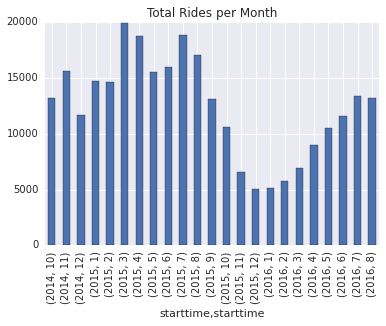

In [7]:
monthly_trips = trips['starttime'].groupby([trips.starttime.dt.year, trips.starttime.dt.month]).agg('count')
monthly_trips.plot(kind='bar', title="Total Rides per Month");

Because we don't have complete data for 2014 and 2016, let's instead focus in on the full-year 2015 data.

In [8]:
trips_2015 = trips[trips.starttime.dt.year == 2015]

Now we can group this data by month and plot the result.

In [9]:
monthly_trips_2015 = trips_2015['starttime'].groupby(trips_2015.starttime.dt.month).agg('count')

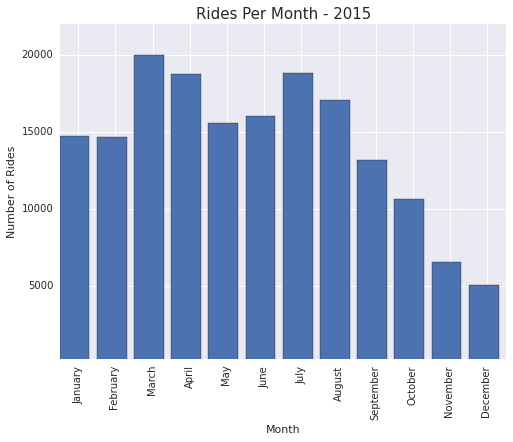

In [10]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', \
          'November', 'December'] #for use in labeling our graph.
x = range(len(months))
y = monthly_trips_2015.values

plt.figure(figsize=(8, 6))
ax = plt.subplot()
plt.bar(x, y)

ax.set_xticks(range(len(months)))
ax.set_xticks([float(n)+0.5 for n in ax.get_xticks()]) #position the xticks in the centers of the bars
ax.set_xticklabels(months, rotation='vertical')

plt.ylim([250,22000])

plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.title('Rides Per Month - 2015', fontdict = {'fontsize' : 15});

From this, we can clearly see that rides peak in March, with April, July, and August following close behind.  Rides are at their lowest in December and November. This information could be used to help with things such as bike stocking or ad campaign planning.

## Average Trip Duration per Month - 2015

Now let's use the same process to look at average trip duration per month to see if there are any trends.

In [11]:
average_duration_2015 = trips_2015['trip_minutes'].groupby([trips_2015.starttime.dt.month]).mean()

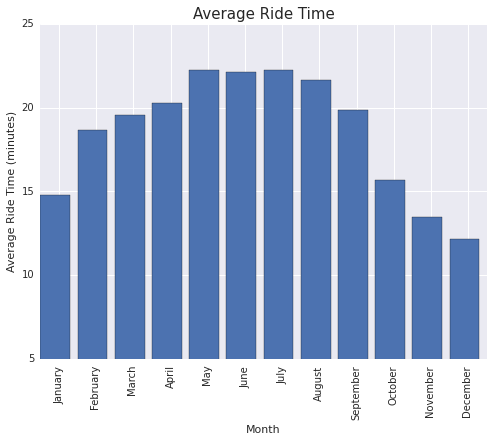

In [12]:
x = range(len(months))
y = average_duration_2015.values

plt.figure(figsize=(8, 6))
ax = plt.subplot()
plt.bar(x, y)

ax.set_xticks(range(len(months)))
ax.set_xticks([float(n)+0.5 for n in ax.get_xticks()])
ax.set_xticklabels(months, rotation='vertical')

plt.ylim([5,25])

plt.xlabel('Month')
plt.ylabel('Average Ride Time (minutes)')
plt.title('Average Ride Time', fontdict = {'fontsize' : 15});

From this analysis, we can see that while people take more rides in March, April and July, their rides last the longest in May, June, and July.  Since people are using the bikes more frequently and for longer periods of time in July, it is likely that bike docking stations would be emptier in that month, and may need more frequent restocking.